In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

cell-images-for-detecting-malaria.zip  x_test.npy   y_train.npy
kaggle.json			       x_train.npy  y_val.npy
Malaria				       x_val.npy
new-plant-diseases-dataset.zip	       y_test.npy


In [ ]:
import numpy as np

x_train = np.load("x_train.npy")
x_val = np.load("x_val.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

In [6]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.AveragePooling2D(2, 2), #metode averagepooling mengambil nilai rata rata pergerseran pixel yang ada
    tf.keras.layers.GlobalAveragePooling2D(), #globalaveragepooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

print ("Model 2 metode averagepooling")
model2.summary()

Model 2 metode averagepooling
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 124, 124, 32)     0         
 ooling2D)                                                       
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)          

In [7]:
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [8]:
NN = model2.fit(x_train, y_train, 
              batch_size=32,
              steps_per_epoch=32, 
              epochs=100, 
              validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 43s 1s/step - loss: 0.0000e+00 - acc: 0.2578 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 2/100
32/32 [==============================] - 41s 1s/step - loss: 0.0000e+00 - acc: 0.2607 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 3/100
32/32 [==============================] - 41s 1s/step - loss: 0.0000e+00 - acc: 0.2588 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 4/100
32/32 [==============================] - 41s 1s/step - loss: 0.0000e+00 - acc: 0.2471 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 5/100
32/32 [==============================] - 41s 1s/step - loss: 0.0000e+00 - acc: 0.2451 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 6/100
32/32 [==============================] - 41s 1s/step - loss: 0.0000e+00 - acc: 0.2646 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 7/100
32/32 [==============================] - 40s 1s/step - loss: 0.0000e+00 - acc: 0.2733 - val_loss: 0.0000e+00 - val_acc: 0.2556
Epoch 8/100
32/32 [========

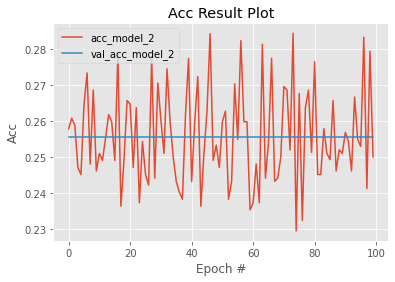

In [9]:
#Plot hasil training model berupa hasil validasi akurasi dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), NN.history["acc"], label="acc_model_2")
plt.plot(np.arange(0, 100), NN.history["val_acc"], label="val_acc_model_2")
plt.title("Acc Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

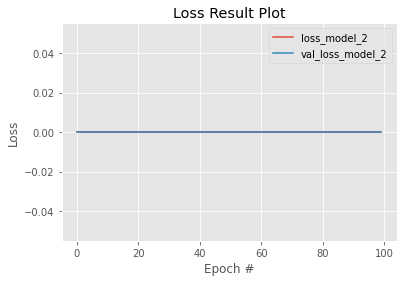

In [10]:
#Plot hasil training model berupa hasil validasi loss dan Buat report klasifikasi beserta dengan keterangan labelnya
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), NN.history["loss"], label="loss_model_2")
plt.plot(np.arange(0, 100), NN.history["val_loss"], label="val_loss_model_2")
plt.title("Loss Result Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
#model 2
from sklearn.metrics import classification_report

pred = model2.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1612
           1       0.26      1.00      0.41      1589
           2       0.00      0.00      0.00      1408
           3       0.00      0.00      0.00      1606

    accuracy                           0.26      6215
   macro avg       0.06      0.25      0.10      6215
weighted avg       0.07      0.26      0.10      6215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
